# Understanding Kernels in Gaussian Processes Regression
> Using GPy and some interactive visualisations for understanding GPR and applying on a real world data set

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

### Disclaimer

This blog post is forked from [GPSS 2019](http://gpss.cc/gpss19/) [Lab 1](https://nbviewer.jupyter.org/github/gpschool/labs/blob/2019/2019/.answers/lab_1.ipynb). This is produced only for educational purposes. All credit goes to the GPSS organisers. 

In [1]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy
from IPython.display import display


### Covariance functions, aka kernels

We will define a covariance function, from hereon referred to as a kernel, using `GPy`. The most commonly used kernel in machine learning is the Gaussian-form radial basis function (RBF) kernel. It is also commonly referred to as the exponentiated quadratic or squared exponential kernel &ndash; all are equivalent.

The definition of the (1-dimensional) RBF kernel has a Gaussian-form, defined as:

$$
    \kappa_\mathrm{rbf}(x,x') = \sigma^2\exp\left(-\frac{(x-x')^2}{2\mathscr{l}^2}\right)
$$

It has two parameters, described as the variance, $\sigma^2$ and the lengthscale $\mathscr{l}$.

In GPy, we define our kernels using the input dimension as the first argument, in the simplest case `input_dim=1` for 1-dimensional regression. We can also explicitly define the parameters, but for now we will use the default values:

In [2]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(lengthscale=0.5, input_dim=1, variance=4)
# Preview the kernel's parameters
k

rbf.,value,constraints,priors
variance,4.0,+ve,
lengthscale,0.5,+ve,


In [3]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
ls = [0.0005, 0.05, 0.25, 0.5, 1., 2., 4.]

X = np.linspace(0.,1.,500)# 500 points evenly spaced over [0,1]
X = X[:,None]
mu = np.zeros((500))

def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X,X)
    Z = np.random.multivariate_normal(mu,C,40)
    for i in range(40):
        ax.plot(X[:],Z[i,:],color='k',alpha=0.2)
    ax.set_title("$\kappa_{rbf}(x,x')$\nLength scale = %s" %k.lengthscale[0]);
    ax.set_ylim((-4, 4))



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

### In the animation above, as you increase the length scale, the learnt functions keep getting smoother.

In [4]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
var = [0.0005, 0.05, 0.25, 0.5, 1., 2., 4., 9.]

X = np.linspace(0.,1.,500)# 500 points evenly spaced over [0,1]
X = X[:,None]
mu = np.zeros((500))

def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.variance = var[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X,X)
    Z = np.random.multivariate_normal(mu,C,40)
    for i in range(40):
        ax.plot(X[:],Z[i,:],color='k',alpha=0.2)
    ax.set_title("$\kappa_{rbf}(x,x')$\nVariance = %s" %k.variance[0]);
    ax.set_ylim((-4, 4))



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

### In the animation above, as you increase the variance, the scale of values increases.

In [5]:
X1 = np.array([1, 2, 3]).reshape(-1, 1)

y1 = np.array([0, 1, 0]).reshape(-1, 1)
y2 = np.array([0, -1, 0]).reshape(-1, 1)
y3 = np.array([0, 10, 0]).reshape(-1, 1)
y4 = np.array([0, 0.3, 0]).reshape(-1, 1)

  rbf.         |                value  |  constraints  |  priors
  variance     |    0.262031485550043  |      +ve      |        
  lengthscale  |  0.24277532672486218  |      +ve      |        


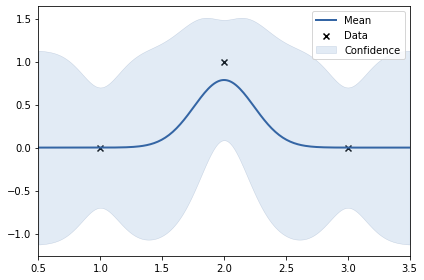

In [7]:
k = GPy.kern.RBF(lengthscale=0.5, input_dim=1, variance=4)

m = GPy.models.GPRegression(X1, y1, k)
#m.Gaussian_noise = 0.0
m.optimize()
print(k)
m.plot();

  rbf.         |                value  |  constraints  |  priors
  variance     |    0.262031485550043  |      +ve      |        
  lengthscale  |  0.24277532672486218  |      +ve      |        


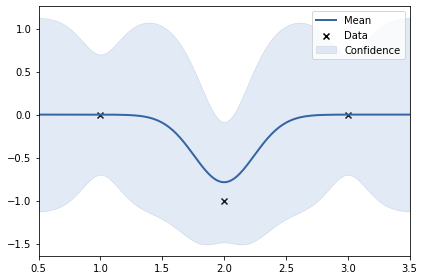

In [8]:
k = GPy.kern.RBF(lengthscale=0.5, input_dim=1, variance=4)

m = GPy.models.GPRegression(X1, y2, k)
#m.Gaussian_noise = 0.0
m.optimize()
print(k)
m.plot();

### In the above two examples, the y values are: 0, 1, 0 and 0, -1, 0. This shows smoothness. Thus, length scale can be big (0.24)

  rbf.         |                value  |  constraints  |  priors
  variance     |   16.918792970578004  |      +ve      |        
  lengthscale  |  0.07805339389352635  |      +ve      |        


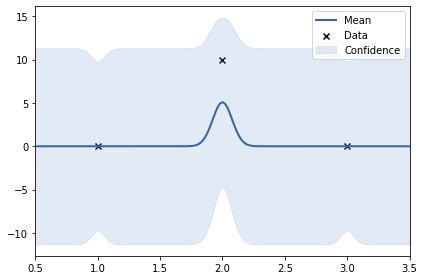

In [9]:
k = GPy.kern.RBF(lengthscale=0.5, input_dim=1, variance=4)

m = GPy.models.GPRegression(X1, y3, k)
#m.Gaussian_noise = 0.0
m.optimize()
print(k)
m.plot();

### In the above example, the y values are: 0, 10, 0. The data set is not smooth. Thus, length scale learnt uis very small (0.24). Noise variance of RBF kernel also increased to accomodate the 10.

  rbf.         |                 value  |  constraints  |  priors
  variance     |  5.90821963086592e-06  |      +ve      |        
  lengthscale  |     2.163452641925496  |      +ve      |        


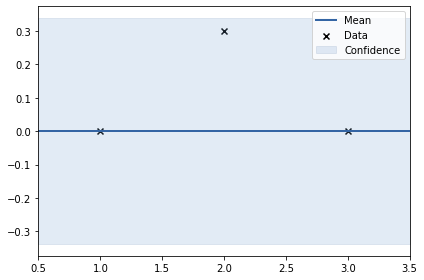

In [10]:
k = GPy.kern.RBF(lengthscale=0.5, input_dim=1, variance=4)

m = GPy.models.GPRegression(X1, y4, k)
#m.Gaussian_noise = 0.0
m.optimize()
print(k)
m.plot();

### In the above examples, the y values are: 0, 0.3, 0. The data set is the smoothest amongst the four. Thus, length scale learnt is large (2.1). Noise variance of RBF kernel is also small.